# Analyses statistiques et visualisations des variables **numériques**

## Objectif

Déterminer, pour chaque variable numérique, le meilleur mode de gestion des NaN en fonction de la distribution des données

## Sommaire

1. Initialisation
2. Analyse globale
3. Création d'une fonction `rapport_stat`
4. Définition d'une fonction `distrib_grandeur_location()`
5. Étude des variables prioritaires
6. Étude des variables secondaires

## 1. Initialisation

In [1]:
# Importation des bibliothèques et modules nécessaires au fonctionnement de ce notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Définition des paramètres esthétiques généraux

%matplotlib inline
sns.set_theme(style = "whitegrid", palette = "bright")

In [3]:
# Importation du jeu de données et enregistrement dans le DataFrame `df`

df = pd.read_csv("../data/raw/weatherAUS.csv")

In [4]:
# Affichage des 5 premières lignes de `df`

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## 2. Analyse globale

In [5]:
# Création d'une copie de df contenant toutes les variables quantitatives:

num = df.select_dtypes(include = float).copy()
num.head()

# Nous avons 16 variables qualitatives à étudier pour décider d'un mode de gestion des nan.
# Variables explicatives: MinTemp, MaxTemp,  Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm	, 
# Humidity9am, Humidity3pm, Pressure9am	, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [6]:
num.describe()
# A la simple lecture des éléments statistiques, rien de très choquant n'apparait.  Les valeurs min et max sont des valeurs plausibles pour toutes les grandeurs.
# Regardons de plus prêt.

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


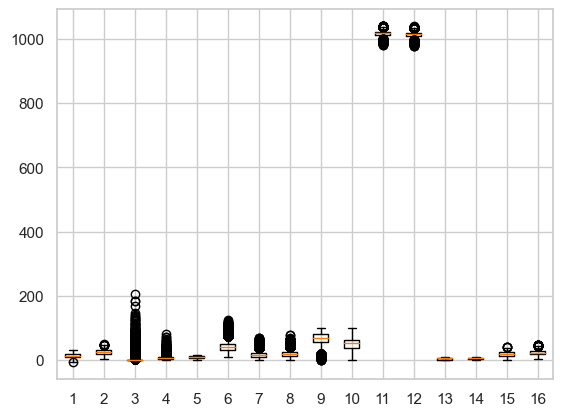

In [7]:
df_num = df.select_dtypes(float).copy().dropna() # faut dropna pour visualiser le box plot, sinon ça marche pas.
plt.boxplot([df_num[col] for col in df_num.columns]) # matplotlib permet d'afficher des boxplot par compréhension de liste. Mais l'étiquette de l'axe des x n'est pas automatique.
#plt.xticks(np.arange(1, 17), df_num.columns)
#plt.xticks(rotation = 90)
plt.show()
# Les échelles des variables sont très différentes, ce qui rend ce graphique peu lisible.

In [8]:
# OC, 25/10 : test de df_num.describe() sans NaN.

df_num.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000
mean,13.335368,24.123051,2.118817,5.442443,7.694000,40.574971,15.255838,19.590648,66.229171,49.709698,1017.331254,1014.880311,4.250824,4.330964,18.078980,22.622816
std,6.465612,6.974096,6.987206,3.690139,3.766318,13.396433,8.594614,8.570241,18.618896,20.212989,6.940412,6.900770,2.802908,2.649844,6.603839,6.835496
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.900000,3.700000
25%,8.400000,18.600000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,36.000000,1012.700000,1010.100000,1.000000,2.000000,12.900000,17.300000
50%,13.100000,23.800000,0.000000,4.800000,8.600000,39.000000,15.000000,19.000000,67.000000,51.000000,1017.300000,1014.800000,5.000000,5.000000,17.700000,22.300000
75%,18.300000,29.600000,0.600000,7.400000,10.700000,48.000000,20.000000,24.000000,80.000000,63.000000,1022.000000,1019.500000,7.000000,7.000000,23.200000,27.800000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000


In [9]:
# OC, 25/10 : séparation en deux cellules :
# - de la mise à l'échelle du DataFrame
# - et de son traçage

## Mise à l'échelle
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns = df_num.columns) ## OC, 25/10 : ajout d'un argument `columns` afin de restituer les noms des colonnes après la mise à l'échelle

In [10]:
# OC, 25/10 : vérification du bon déroulement de l'opération

df_num_scaled.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.705992,1.588313,-0.303245,1.777064,1.222955,0.554259,-1.076944,0.047765,-2.482938,-1.816160,-1.589437,-1.518729,-0.803039,0.252484,1.290324,1.576663
1,0.783325,0.684962,-0.303245,2.535850,1.408815,-0.266862,0.435644,-0.068919,-1.945845,-2.063527,-0.638477,-0.402902,-1.159814,-1.257052,0.336325,0.640366
2,0.937991,1.932446,-0.303245,1.451870,0.771582,0.404964,1.715527,-0.535654,-1.301333,-1.370898,-0.724928,-0.823149,-1.159814,0.629868,1.608324,1.796108
3,1.324655,2.047157,-0.303245,1.614467,1.196404,-0.714746,-1.076944,-1.585809,-1.569879,-1.370898,-0.667294,-0.837640,-1.159814,0.252484,1.668895,1.898515
4,1.680386,2.419969,-0.303245,1.560268,0.187453,-0.416157,0.202938,-0.769022,-2.536647,-1.717212,-0.955464,-1.083991,-1.159814,0.629868,2.350323,2.191108


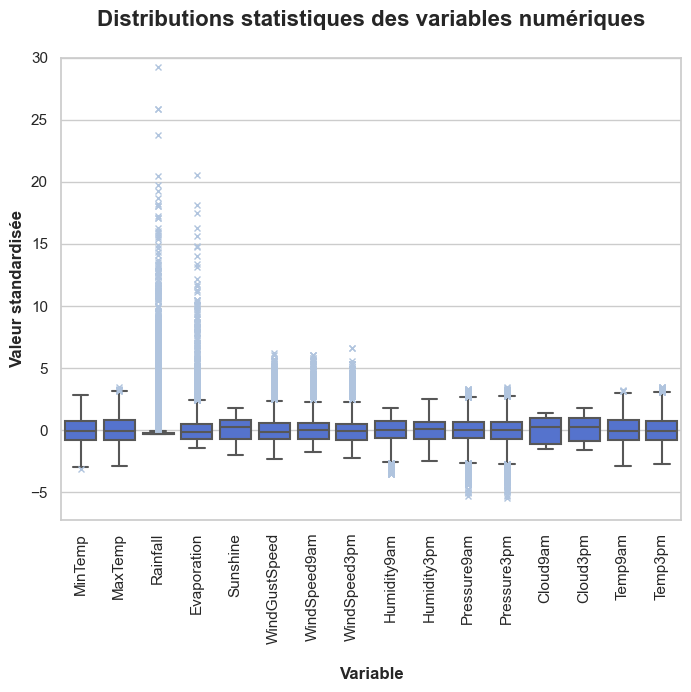

In [11]:
# OC, 25/10 : séparation en deux cellules :
# - de la mise à l'échelle du DataFrame
# - et de son traçage

## Traçage
plt.figure(figsize = (8, 6))

sns.boxplot(df_num_scaled, 
            color = "royalblue", 
            flierprops = {"marker": "x", 
                          "markeredgecolor": "lightsteelblue"}) # OC, 25/10 : simplification du code de traçage

plt.xticks(rotation = 90) # OC, 25/10 : enrichissement de la mise en forme
plt.ylim(top = 30)
plt.xlabel("\nVariable", 
           fontweight = "bold")
plt.ylabel("Valeur standardisée", 
           fontweight = "bold")
plt.title("Distributions statistiques des variables numériques\n", 
          fontweight = "bold", 
          fontsize = 16)

plt.show()

# C'est plus clair.
# Bilan: il faut regarder de plus prêt en priorité les grandeurs suivantes:
# Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Pressure9am, Pressure3pm
# Eventuellement regarder ensuite:
# MinTemp, MaxTemp, Temp9am, Temp3pm

## 3. Définition d'une fonction `rapport_stat`

In [12]:
def rapport_stat(mesure):
    """
    Pour une colonne numérique d'un DataFrame, cette fonction calcule et imprime les nombres de valeurs extrêmes, puis trace les données sous forme de graphique en boîte à moustaches.

    Paramètres :
        mesure : nom de la colonne (sous format `str`).

    Renvoie :
        nombre de valeurs extrêmes inférieures
        taux de valeurs extrêmes inférieures (par rapport au nombre total de lignes de la colonne)
        nombre de valeurs extrêmes supérieures
        taux de valeurs extrêmes supérieures (par rapport au nombre total de lignes de la colonne)
        graphique en boîte à moustaches
    """
    df_mes = df[mesure].copy()
    df_mes.dropna(inplace = True)

    ext_min = df_mes.quantile(q = 0.25)-1.5*(df_mes.quantile(q = 0.75)-df_mes.quantile(q = 0.25))
    # ext_min est la frontière pour les valeurs extrèmes minimales, cad < Q1 -1.5*IQR
    ext_max = df_mes.quantile(q = 0.75)+1.5*(df_mes.quantile(q = 0.75)-df_mes.quantile(q = 0.25))
    # ext_max est la frontière pour les valeurs extrèmes maximales, cad > Q + 1.5*IQR

    df_mes_min = df_mes.loc[df_mes < ext_min]
    print("Il y a", df_mes_min.shape[0], "valeurs extrêmes inférieures pour la mesure", str(mesure),  "sur", df_mes.shape[0], "valeurs mesurées.")
    p_min = round(df_mes_min.shape[0]/df_mes.shape[0]*100, 2)
    print("Cela correspond à",p_min , "% des valeurs de cette colonne.")
    print("-------------------------------------------")

    df_mes_max = df_mes.loc[df_mes > ext_max]
    print("Il y a", df_mes_max.shape[0], "valeurs extrêmes supérieures pour la mesure" , str(mesure),  "sur", df_mes.shape[0], "valeurs mesurées.") # OC : remplacé « inférieures » par « supérieures »
    p_max = round(df_mes_max.shape[0]/df_mes.shape[0]*100, 2)
    print("Cela correspond à",p_max , "% des valeurs de cette colonne.")
    
    import statsmodels.api as sm
    plt.figure(figsize=(7,5))

    plt.boxplot(df_mes)

    plt.xlabel(str(mesure), fontweight = "bold")
    plt.ylabel('Valeurs en mm', fontweight = "bold")
    plt.title('Distribution de la grandeur '+ mesure + "\n", fontweight = "bold", fontsize = 16)
    plt.axes([0.65, 0.6525, 0.2, 0.15])
    plt.hist(df_mes, rwidth = 0.8, color = 'royalblue')
    plt.title('Histogramme')
    #plt.xticks([])
    plt.yticks([])

    #sm.qqplot(df_mes, fit = True, line = '45')
    plt.show()

## 4. Définition d'une fonction `distrib_grandeur_location()`

In [13]:
def distrib_grandeur_location(mesure, unit, color_box, color_mark):
    """
    Pour une colonne numérique du DataFrame sous étude, cette fonction trace les données sous forme de graphique en boîte à moustaches en fonction de l'emplacement des stations météorologiques.

    Paramètres (sous format `str`) :
        mesure : nom de la colonne.
        unit : unité de mesure de la colonne.
        color_box : couleur des boîtes à moustaches.
        color_mark : couleur des marquers des valeurs extrêmes. 

    Renvoie :
        graphique en boîte à moustaches
    """
    # Initialisation de l'existence de stations météo ayant zéro entrée dans la colonne « mesure »
    df_location_mes_counts = df[["Location", mesure]].groupby("Location").count()

    ## Initialisation de la toile
    fig, ax = plt.subplots(figsize = (8, 12))

    ## Traçage
    sns.boxplot(y = df["Location"].sort_values(ascending = True), 
                x = df[mesure], 
                color = color_box, 
                flierprops = {"marker": "x", 
                              "markeredgecolor": color_mark})

    ## Mise en forme
    #plt.xticks(rotation = 90)
    #plt.ylim(df[mesure].min(), df[mesure].max())
    plt.ylabel("Location", fontweight = "bold")
    plt.xlabel("\n" + mesure +  " (en "+ unit + ")", fontweight = "bold")
    plt.title("Distribution de " + mesure + " par station météorologique\n", fontweight = "bold", fontsize = 16);

    ### Mise en évidence des stations météo ne disposant pas de données pour « mesure »
    for index in range(len(df_location_mes_counts)):
        if df_location_mes_counts.iloc[index][0] == 0:
            ax.get_yticklabels()[index].set_color("#dda15e")
            ax.get_yticklabels()[index].set_weight("bold")

 # AW: La fonction renvoie bien un graphique. 
 # J'ai un problème non résolu: dans l'écriture de la fonction, j'appelle mesure (entre parenthèses)
 # Pour qu'elle fonctionne, il faut rentrer 'Pressure9am', au lieu de simplement Pressure9am.
 # Est-ce possible de modifier ça?

## 5. Étude des variables prioritaires

### `Rainfall`

Il y a 0 valeurs extrêmes inférieures pour la mesure Rainfall sur 142199 valeurs mesurées.
Cela correspond à 0.0 % des valeurs de cette colonne.
-------------------------------------------
Il y a 25578 valeurs extrêmes supérieures pour la mesure Rainfall sur 142199 valeurs mesurées.
Cela correspond à 17.99 % des valeurs de cette colonne.


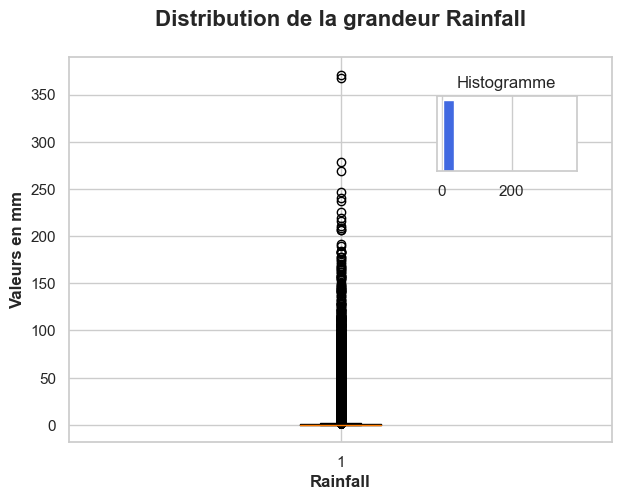

In [14]:
rapport_stat('Rainfall')

In [15]:
# 18% de valeurs extrèmes maximales, ça fait beaucoup. Mais Rainfall contient beaucoup de valeurs nulles, quand il ne pleut pas. 
# Enlevons-les et voyons ce que ça donne.

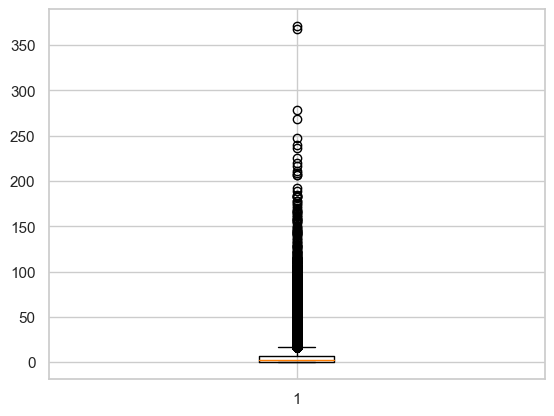

In [16]:
rf = df['Rainfall'].loc[df['Rainfall'] > 0].copy() # on ne garde que les valeurs non-nulles.
rf.dropna(inplace = True)
plt.boxplot(rf);

Il y a 0 valeurs extrêmes inférieures pour la mesure Rainfall sur 51119 valeurs mesurées.
Cela correspond à 0.0 % des valeurs de cette colonne.
-------------------------------------------
Il y a 5220 valeurs extrêmes supérieures pour la mesure Rainfall sur 51119 valeurs mesurées.
Cela correspond à 10.21 % des valeurs de cette colonne.


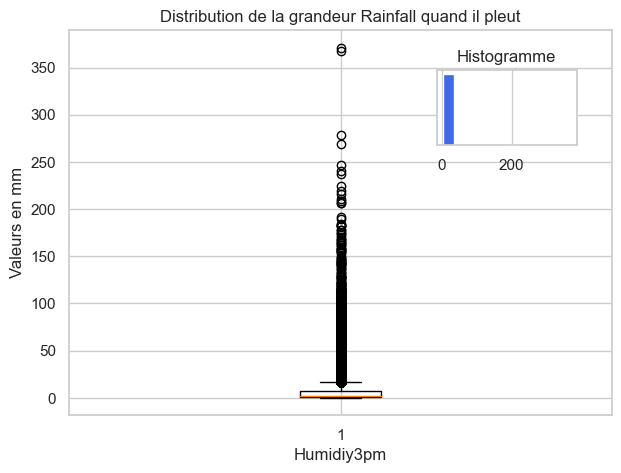

In [17]:
ext_min = rf.quantile(q = 0.25)-1.5*(rf.quantile(q = 0.75)-rf.quantile(q = 0.25))
# ext_min est la frontière pour les valeurs extrèmes minimales, cad < Q1 -1.5*IQR
ext_max = rf.quantile(q = 0.75)+1.5*(rf.quantile(q = 0.75)-rf.quantile(q = 0.25))
# ext_max est la frontière pour les valeurs extrèmes maximales, cad > Q + 1.5*IQR

rf_min = rf.loc[rf < ext_min]
print("Il y a", rf_min.shape[0], "valeurs extrêmes inférieures pour la mesure Rainfall sur", rf.shape[0], "valeurs mesurées.")
p_min = round(rf_min.shape[0]/rf.shape[0]*100, 2)
print("Cela correspond à",p_min , "% des valeurs de cette colonne.")
print("-------------------------------------------")

rf_max = rf.loc[rf > ext_max]
print("Il y a", rf_max.shape[0], "valeurs extrêmes supérieures pour la mesure Rainfall sur", rf.shape[0], "valeurs mesurées.")
p_max = round(rf_max.shape[0]/rf.shape[0]*100, 2) # OC : remplacé « inférieures » par « supérieures »
print("Cela correspond à",p_max , "% des valeurs de cette colonne.")
import statsmodels.api as sm
plt.figure(figsize=(7,5))

plt.boxplot(rf)
plt.xlabel('Humidiy3pm')
plt.ylabel('Valeurs en mm')
plt.title('Distribution de la grandeur Rainfall quand il pleut')
plt.axes([0.65, 0.65, 0.2, 0.15])
plt.hist(rf, rwidth = 0.8, color = 'royalblue')
plt.title('Histogramme')
#plt.xticks([])
plt.yticks([])

#sm.qqplot(h9, fit = True, line = '45')
plt.show()

In [18]:
# On tombe à 10% de valeurs extrèmes maximales, ce qui est encore beaucoup. Mais après tout, c'est peut-être que quand il pleut, il pleut pas beaucoup.
# Et que quelques fois, quand il pleut, il pleut très fort.

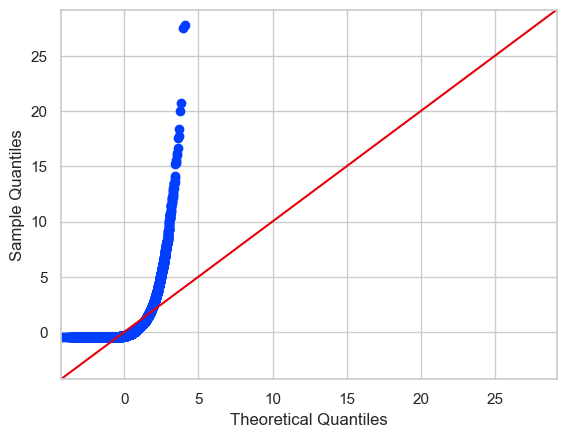

In [19]:
sm.qqplot(rf, fit = True, line = '45');

In [20]:
# La distribution des précipitations n'est pas du tout normale.
# Idée: il faudrait séparer rf en deux classes: 
# faibles précipitations
# fortes précipitations
# et regarder.
# Bilan provisoire: Attention à la gestion des nan.

(-18.55, 400.0)

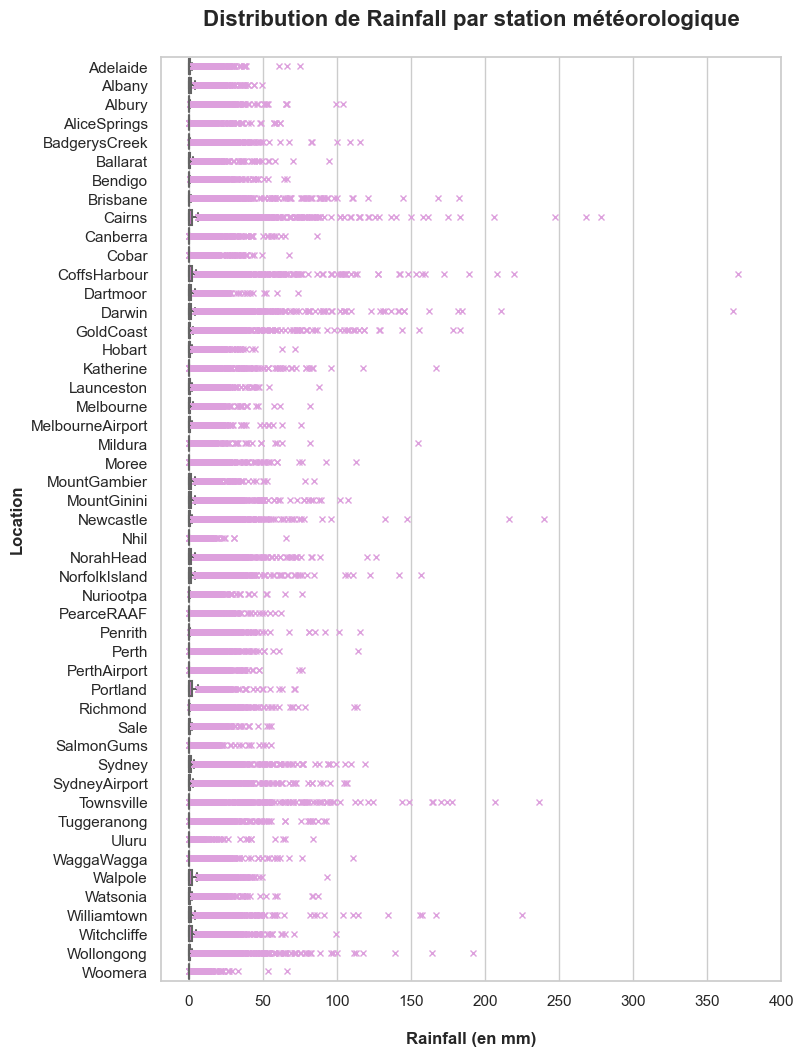

In [21]:
# OC, 22/10

distrib_grandeur_location('Rainfall', unit = 'mm', color_box = 'orchid', color_mark = 'plum')
plt.xlim(right = 400)

### `Evaporation`

Il y a 0 valeurs extrêmes inférieures pour la mesure Evaporation sur 82670 valeurs mesurées.
Cela correspond à 0.0 % des valeurs de cette colonne.
-------------------------------------------
Il y a 1995 valeurs extrêmes supérieures pour la mesure Evaporation sur 82670 valeurs mesurées.
Cela correspond à 2.41 % des valeurs de cette colonne.


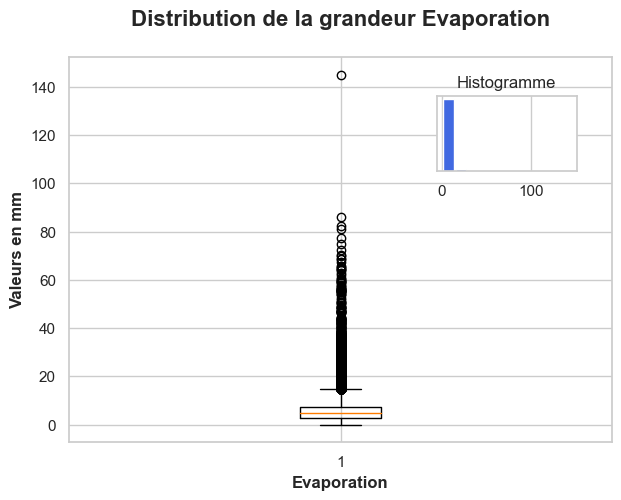

In [22]:
rapport_stat('Evaporation')

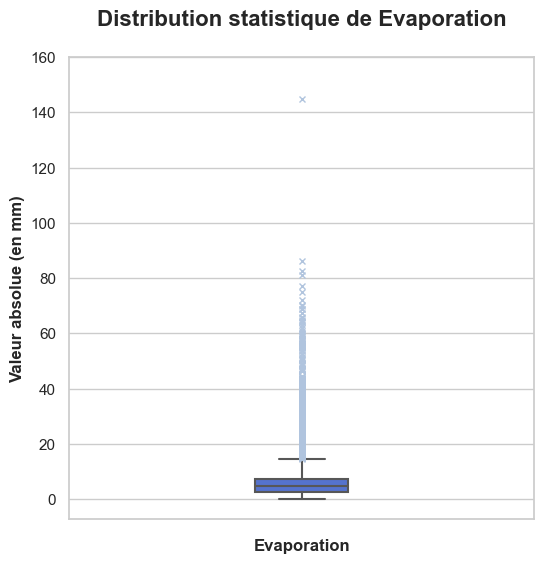

In [23]:
# OC, 25/10 : graphique artisanal (non réalisé avec la fonction rapport_stat) pour rapport 1

plt.figure(figsize = (6, 6))

boxplot_evaporation = sns.boxplot(df["Evaporation"], 
                                  width = 0.2, 
                                  color = "royalblue", 
                                  flierprops = {"marker": "x", 
                                                "markeredgecolor": "lightsteelblue"}) # OC, 25/10 : simplification du code de traçage

boxplot_evaporation.set(xticklabels=[])
plt.ylim(top = 160)

plt.xlabel("Evaporation", 
           fontweight = "bold")
plt.ylabel("Valeur absolue (en mm)", 
           fontweight = "bold")

plt.title("Distribution statistique de Evaporation\n", 
          fontweight = "bold", 
          fontsize = 16)

plt.show()

(-7.25, 80.0)

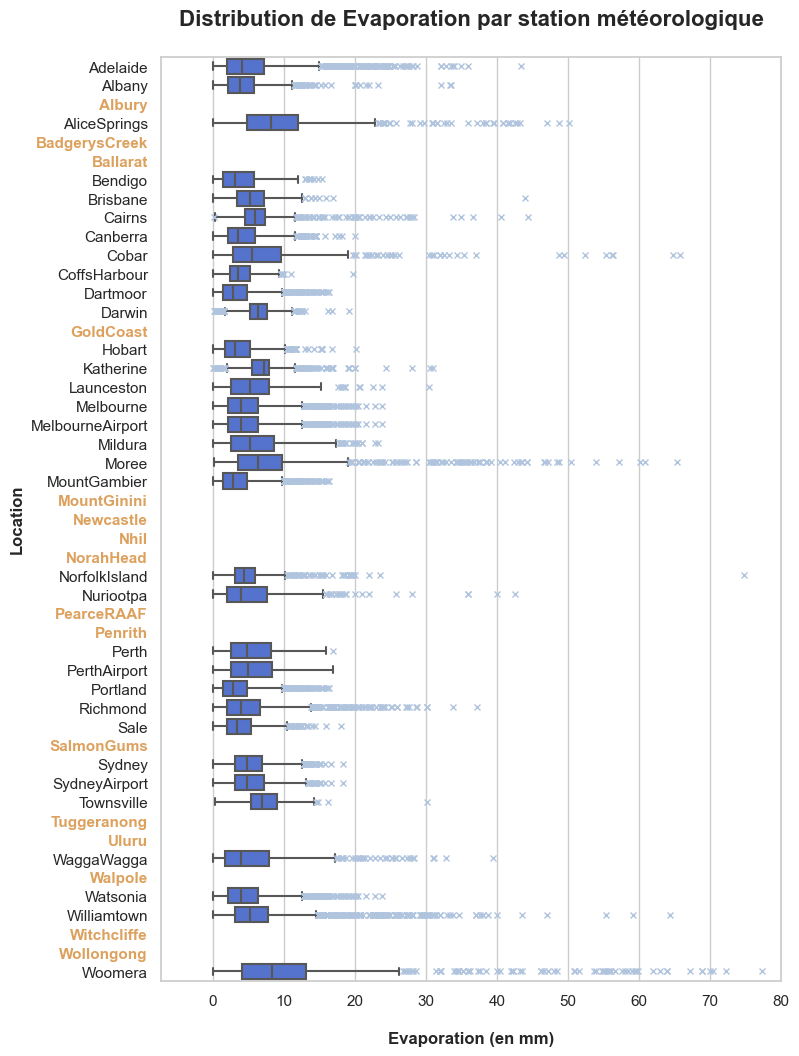

In [24]:
# OC, 25/10 : graphique pour rapport 1

distrib_grandeur_location('Evaporation', unit = 'mm', color_box = 'royalblue', color_mark = 'lightsteelblue')
plt.xlim(right = 80)

### `Sunshine`

Il y a 0 valeurs extrêmes inférieures pour la mesure Sunshine sur 75625 valeurs mesurées.
Cela correspond à 0.0 % des valeurs de cette colonne.
-------------------------------------------
Il y a 0 valeurs extrêmes supérieures pour la mesure Sunshine sur 75625 valeurs mesurées.
Cela correspond à 0.0 % des valeurs de cette colonne.


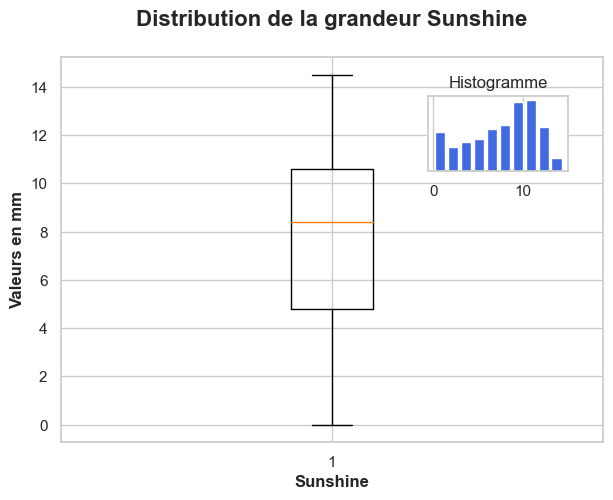

In [25]:
rapport_stat('Sunshine')

(-0.7250000000000001, 16.0)

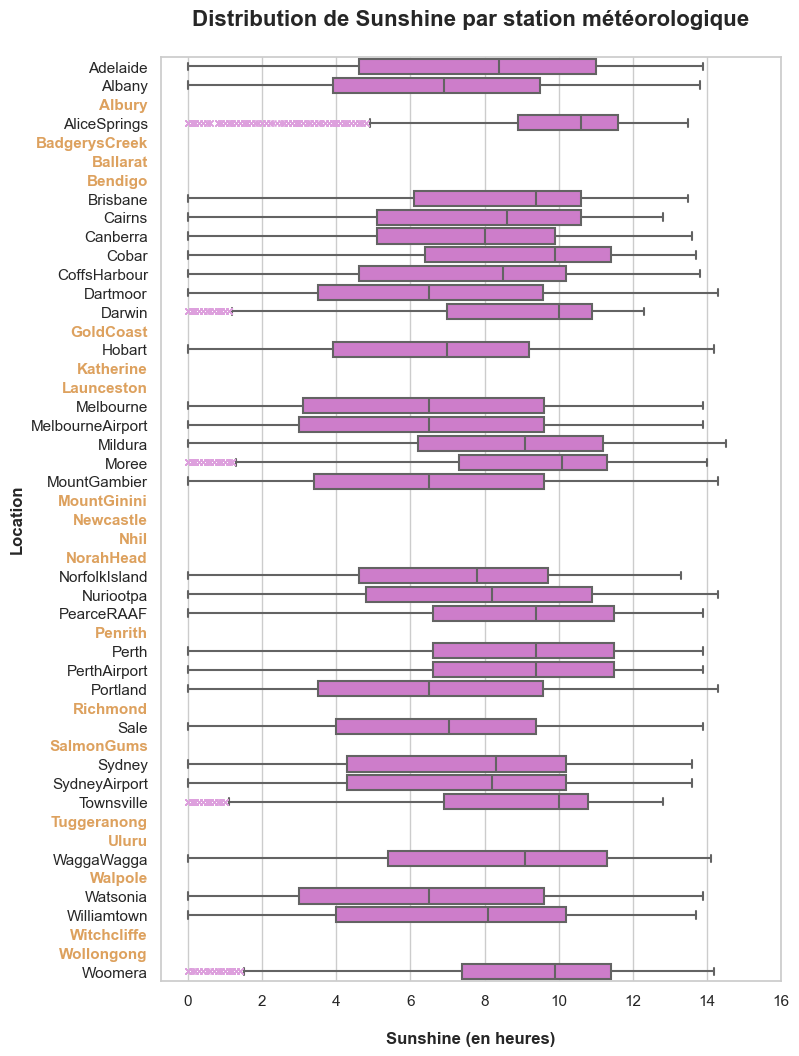

In [26]:
distrib_grandeur_location('Sunshine', unit = 'heures', color_box = 'orchid', color_mark = 'plum')
plt.xlim(right = 16)

### `WindGustSpeed`

Il y a 0 valeurs extrêmes inférieures pour la mesure WindGustSpeed sur 135197 valeurs mesurées.
Cela correspond à 0.0 % des valeurs de cette colonne.
-------------------------------------------
Il y a 3092 valeurs extrêmes supérieures pour la mesure WindGustSpeed sur 135197 valeurs mesurées.
Cela correspond à 2.29 % des valeurs de cette colonne.


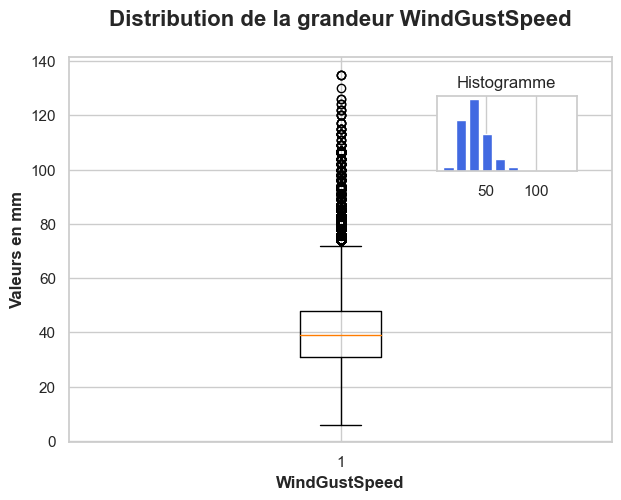

In [27]:
rapport_stat('WindGustSpeed')

(0.0, 140.0)

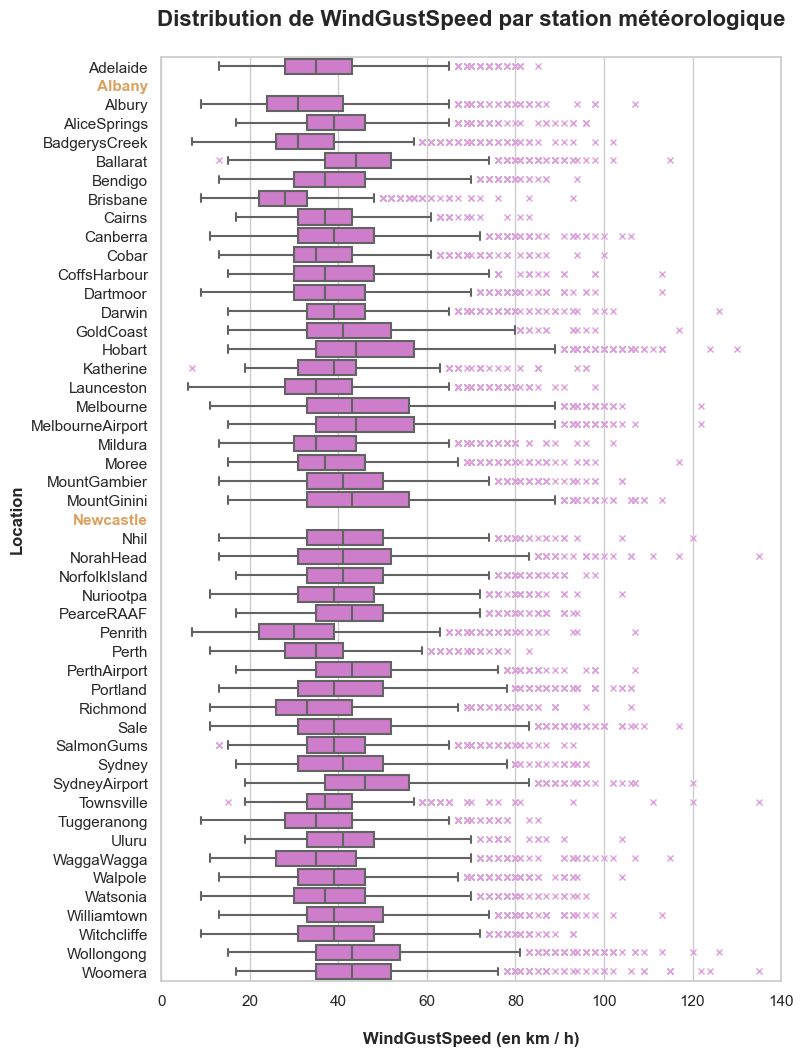

In [28]:
distrib_grandeur_location('WindGustSpeed', unit = 'km / h', color_box = 'orchid', color_mark = 'plum')
plt.xlim(left = 0, right = 140)

### `WindSpeed9am`

Il y a 0 valeurs extrêmes inférieures pour la mesure WindSpeed9am sur 143693 valeurs mesurées.
Cela correspond à 0.0 % des valeurs de cette colonne.
-------------------------------------------
Il y a 1817 valeurs extrêmes supérieures pour la mesure WindSpeed9am sur 143693 valeurs mesurées.
Cela correspond à 1.26 % des valeurs de cette colonne.


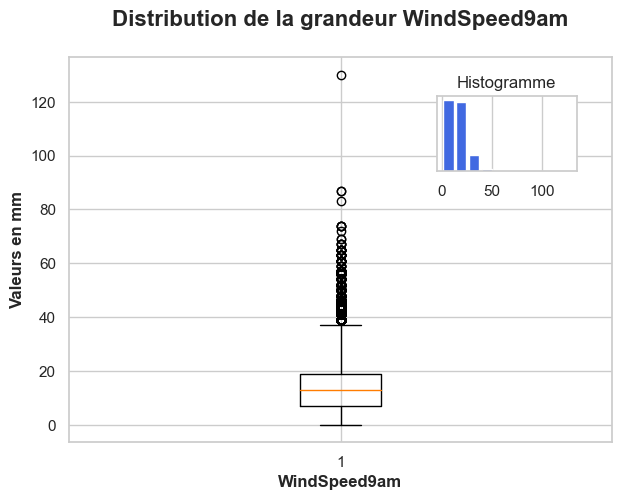

In [29]:
rapport_stat('WindSpeed9am')

(-6.5, 140.0)

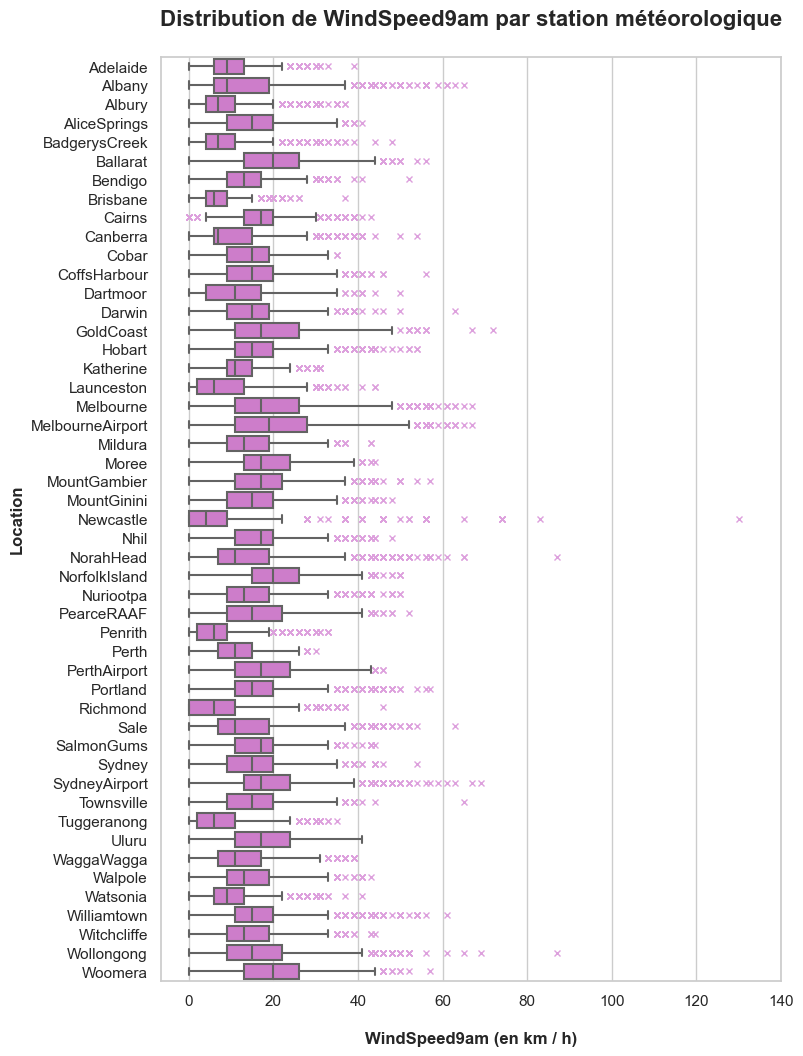

In [30]:
distrib_grandeur_location('WindSpeed9am', unit = 'km / h', color_box = 'orchid', color_mark = 'plum')
plt.xlim(right = 140)

### `WindSpeed3pm`

Il y a 0 valeurs extrêmes inférieures pour la mesure WindSpeed3pm sur 142398 valeurs mesurées.
Cela correspond à 0.0 % des valeurs de cette colonne.
-------------------------------------------
Il y a 2523 valeurs extrêmes supérieures pour la mesure WindSpeed3pm sur 142398 valeurs mesurées.
Cela correspond à 1.77 % des valeurs de cette colonne.


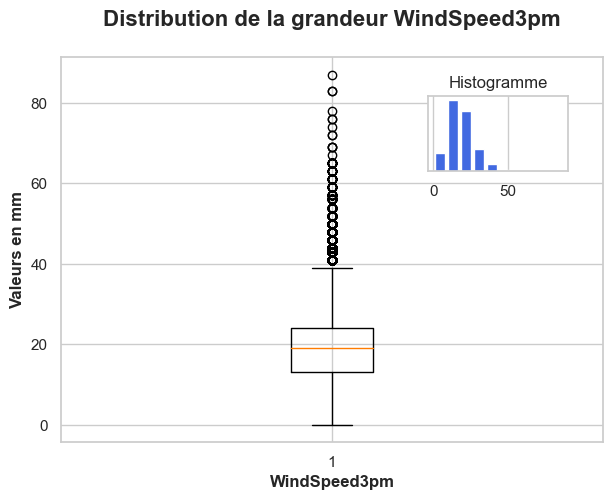

In [31]:
rapport_stat('WindSpeed3pm')

(-4.3500000000000005, 100.0)

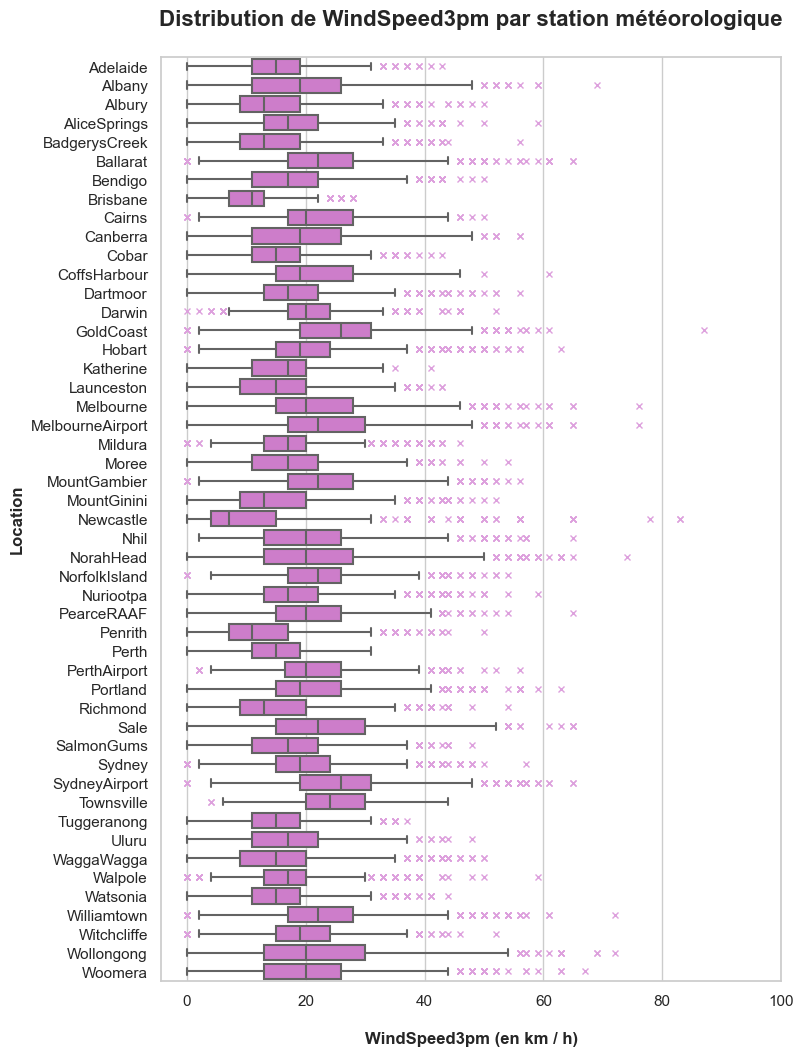

In [32]:
distrib_grandeur_location('WindSpeed3pm', unit = 'km / h', color_box = 'orchid', color_mark = 'plum')
plt.xlim(right = 100)

### `Humidity9am`

In [33]:
# Création d'une copie de la colonne 'Humidity9am': 
h9 = df['Humidity9am'].copy()

# Supression des nan de cette colonne pour visualiser uniquement la répartition des valeurs entrées:
h9.dropna(inplace = True)

Il y a 1425 valeurs extrêmes inférieures pour la mesure Humidity9am sur 142806 valeurs mesurées.
Cela correspond à 1.0 % des valeurs de cette colonne.


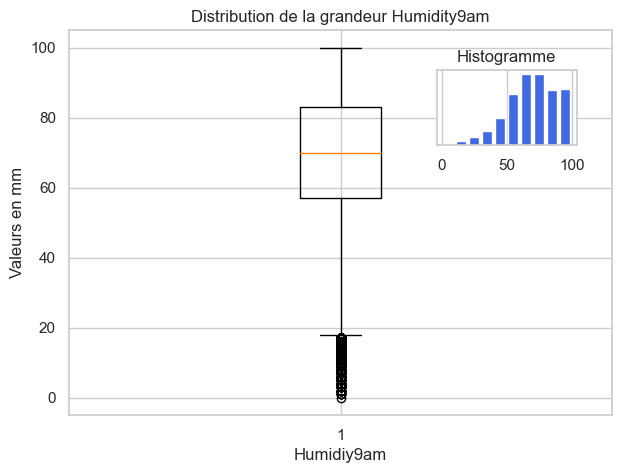

In [34]:
ext_min = h9.quantile(q = 0.25)-1.5*(h9.quantile(q = 0.75)-h9.quantile(q = 0.25))
# ext_min est la frontière pour les valeurs extrèmes minimales, cad < Q1 -1.5*IQR

h9_min = h9.loc[h9 < ext_min]
print("Il y a", h9_min.shape[0], "valeurs extrêmes inférieures pour la mesure Humidity9am sur", h9.shape[0], "valeurs mesurées.")
p = round(h9_min.shape[0]/h9.shape[0]*100, 2)
print("Cela correspond à",p , "% des valeurs de cette colonne.")

plt.figure(figsize=(7,5))

plt.boxplot(h9)
plt.xlabel('Humidiy9am')
plt.ylabel('Valeurs en mm')
plt.title('Distribution de la grandeur Humidity9am')
plt.axes([0.65, 0.65, 0.2, 0.15])
plt.hist(h9, rwidth = 0.8, color = 'royalblue')
plt.title('Histogramme')
#plt.xticks([])
plt.yticks([])

#sm.qqplot(h9, fit = True, line = '45')
plt.show()

In [35]:
# Rien d'anormal ici.
# Bilan: On doit pouvoir gérer les nan en les remplaçant par la moyenne ou la médiane.

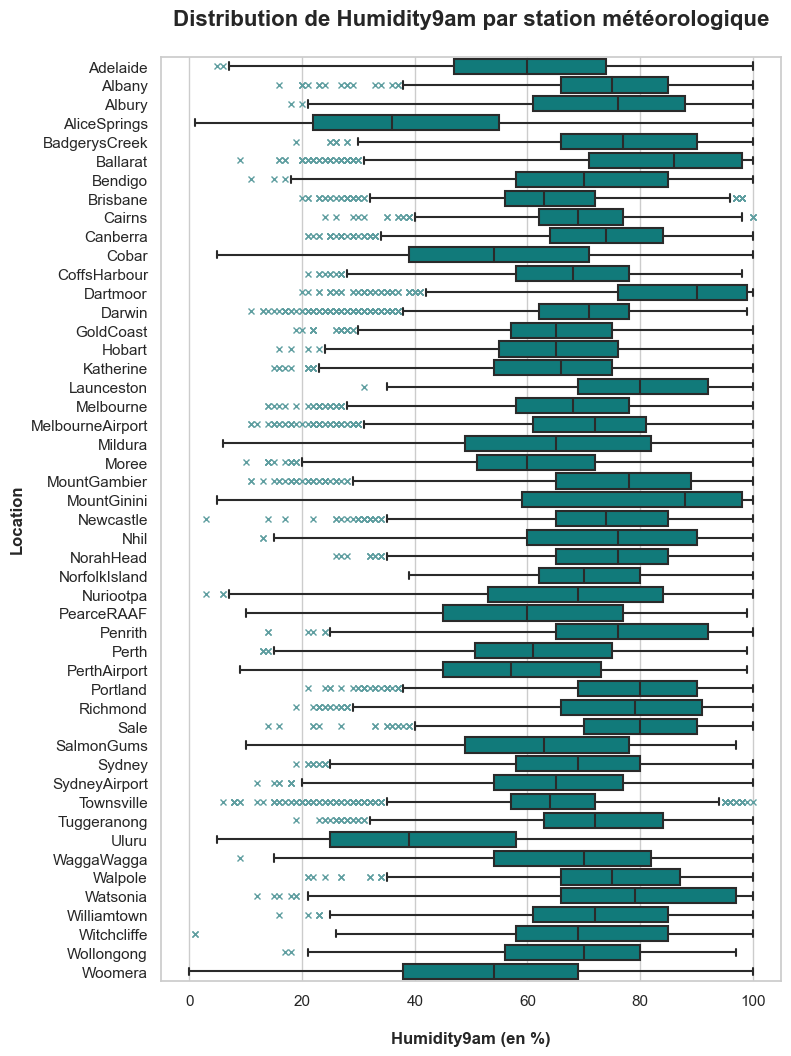

In [36]:
distrib_grandeur_location('Humidity9am', unit = '%', color_box = 'darkcyan', color_mark = 'cadetblue')

### `Humidity3pm`

Il y a 0 valeurs extrêmes inférieures pour la mesure Humidity9am sur 140953 valeurs mesurées.
Cela correspond à 0.0 % des valeurs de cette colonne.
-------------------------------------------
Il y a 0 valeurs extrêmes supérieures pour la mesure Humidity9am sur 140953 valeurs mesurées.
Cela correspond à 0.0 % des valeurs de cette colonne.


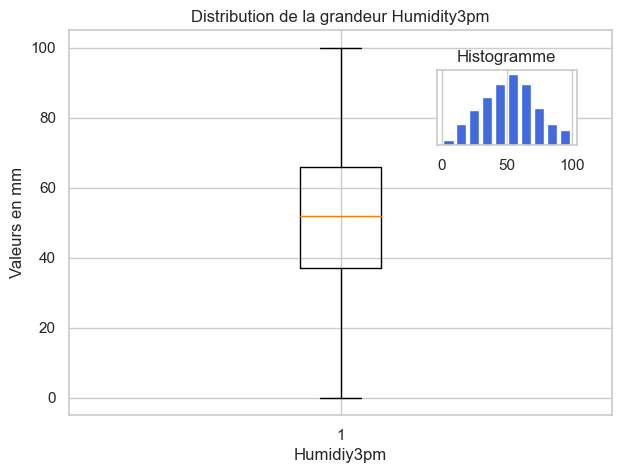

In [37]:
h3 = df['Humidity3pm'].copy()
h3.dropna(inplace = True)

ext_min = h3.quantile(q = 0.25)-1.5*(h3.quantile(q = 0.75)-h3.quantile(q = 0.25))
# ext_min est la frontière pour les valeurs extrèmes minimales, cad < Q1 -1.5*IQR
ext_max = h3.quantile(q = 0.75)+1.5*(h3.quantile(q = 0.75)-h3.quantile(q = 0.25))
# ext_max est la frontière pour les valeurs extrèmes maximales, cad > Q + 1.5*IQR

h3_min = h3.loc[h3 < ext_min]
print("Il y a", h3_min.shape[0], "valeurs extrêmes inférieures pour la mesure Humidity9am sur", h3.shape[0], "valeurs mesurées.")
p_min = round(h3_min.shape[0]/h3.shape[0]*100, 2)
print("Cela correspond à",p_min , "% des valeurs de cette colonne.")
print("-------------------------------------------")

h3_max = h3.loc[h3 > ext_max]
print("Il y a", h3_max.shape[0], "valeurs extrêmes supérieures pour la mesure Humidity9am sur", h3.shape[0], "valeurs mesurées.") # OC : remplacé « inférieures » par « supérieures »
p_max = round(h3_max.shape[0]/h3.shape[0]*100, 2)
print("Cela correspond à",p_max , "% des valeurs de cette colonne.")
import statsmodels.api as sm
plt.figure(figsize=(7,5))

plt.boxplot(h3)
plt.xlabel('Humidiy3pm')
plt.ylabel('Valeurs en mm')
plt.title('Distribution de la grandeur Humidity3pm')
plt.axes([0.65, 0.65, 0.2, 0.15])
plt.hist(h3, rwidth = 0.8, color = 'royalblue')
plt.title('Histogramme')
#plt.xticks([])
plt.yticks([])

#sm.qqplot(h9, fit = True, line = '45')
plt.show()

In [38]:
# Rien d'anormal ici.
# Bilan: On doit pouvoir gérer les nan en les remplaçant par la moyenne ou la médiane.

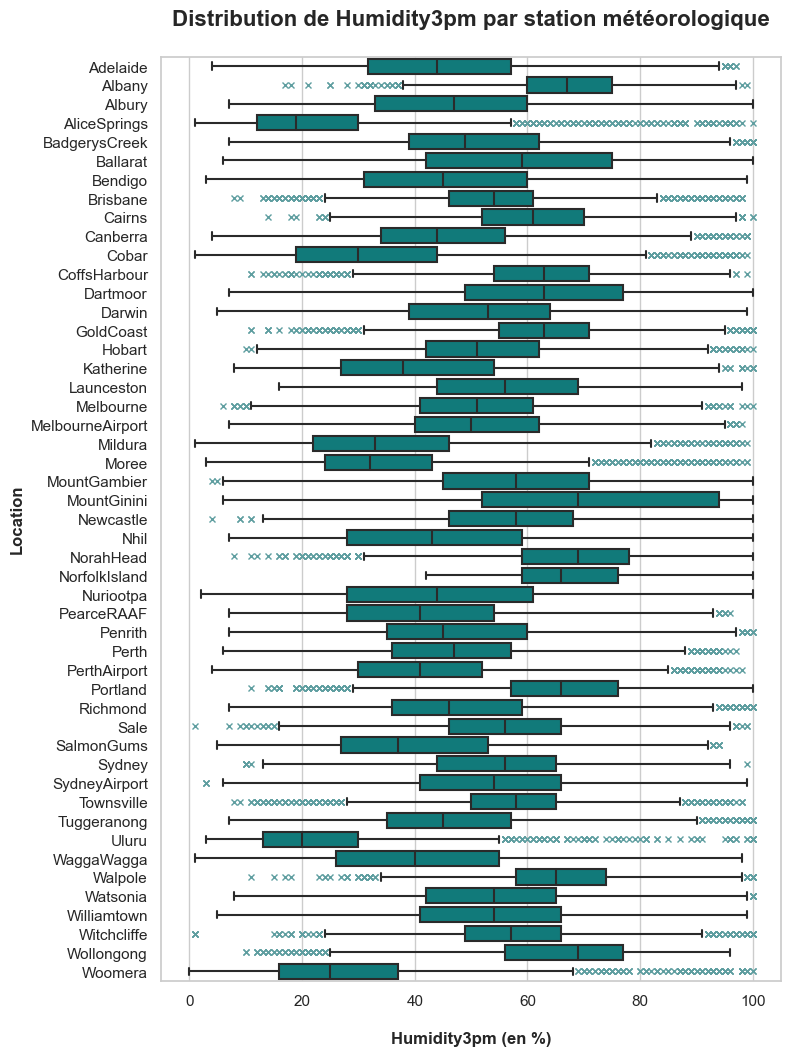

In [39]:
distrib_grandeur_location('Humidity3pm', unit = '%', color_box = 'darkcyan', color_mark = 'cadetblue')

### `Pressure9am`

Il y a 878 valeurs extrêmes inférieures pour la mesure Pressure9am sur 130395 valeurs mesurées.
Cela correspond à 0.67 % des valeurs de cette colonne.
-------------------------------------------
Il y a 313 valeurs extrêmes supérieures pour la mesure Pressure9am sur 130395 valeurs mesurées.
Cela correspond à 0.24 % des valeurs de cette colonne.


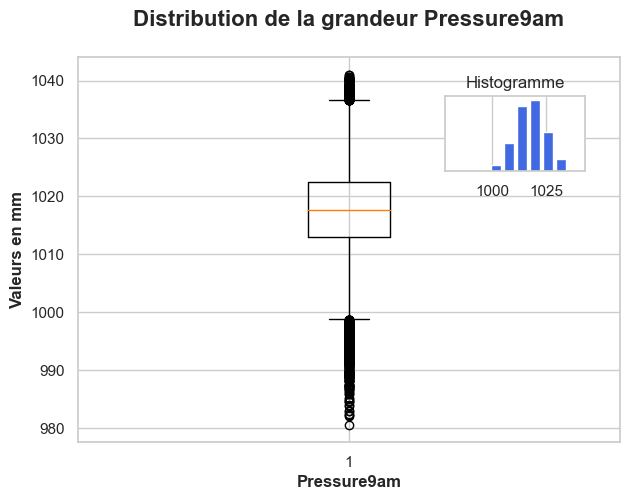

In [40]:
rapport_stat('Pressure9am')

In [41]:
# Rien d'anormal ici.
# Bilan: On doit pouvoir gérer les nan en les remplaçant par la moyenne ou la médiane.

(980.0, 1060.0)

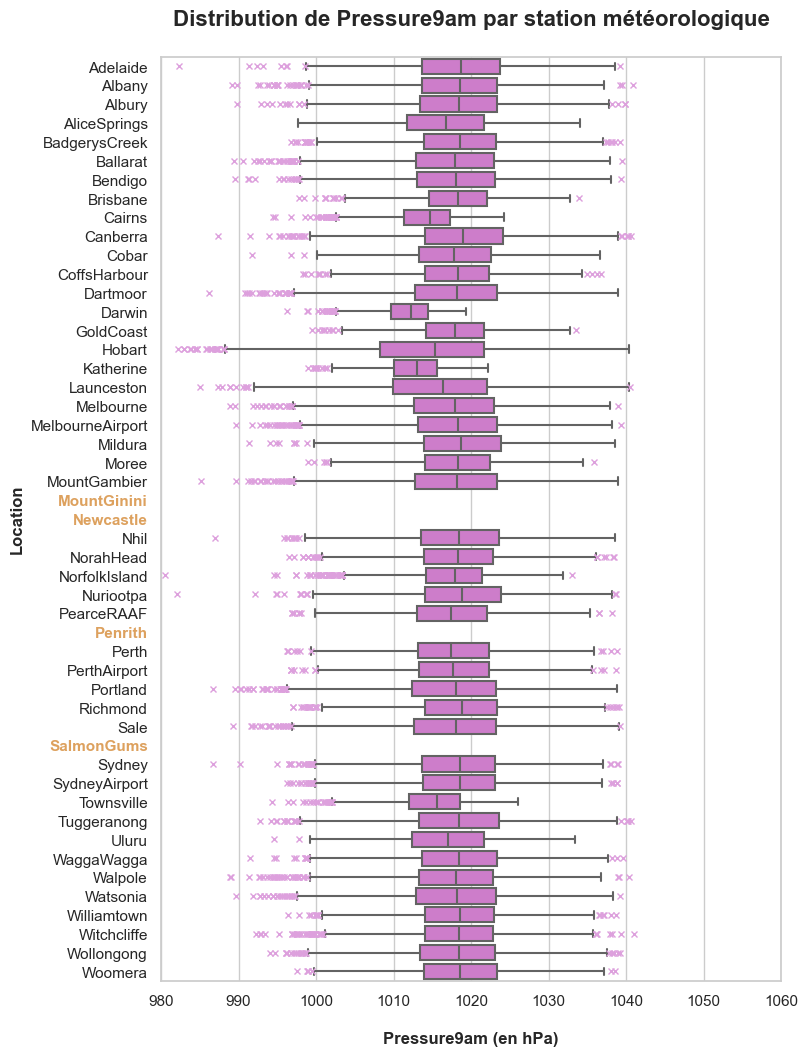

In [42]:
distrib_grandeur_location('Pressure9am', unit = 'hPa', color_box = 'orchid', color_mark = 'plum')
plt.xlim(left = 980, right = 1060)

### `Pressure3pm`

Il y a 631 valeurs extrêmes inférieures pour la mesure Pressure3pm sur 130432 valeurs mesurées.
Cela correspond à 0.48 % des valeurs de cette colonne.
-------------------------------------------
Il y a 288 valeurs extrêmes supérieures pour la mesure Pressure3pm sur 130432 valeurs mesurées.
Cela correspond à 0.22 % des valeurs de cette colonne.


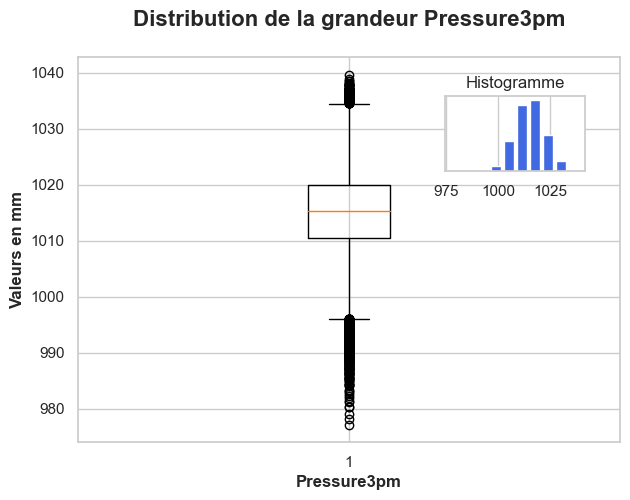

In [43]:
rapport_stat('Pressure3pm')

In [44]:
# Rien d'anormal ici.
# Bilan: On doit pouvoir gérer les nan en les remplaçant par la moyenne ou la médiane.

(960.0, 1060.0)

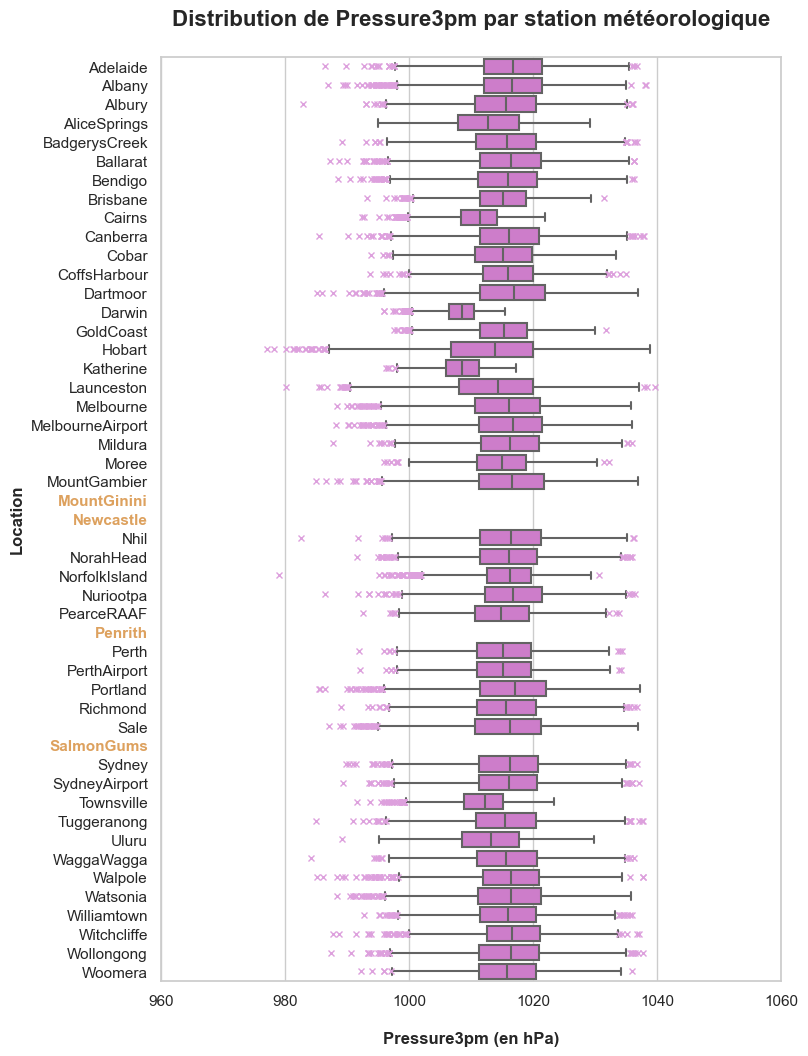

In [45]:
distrib_grandeur_location('Pressure3pm', unit = 'hPa', color_box = 'orchid', color_mark = 'plum')
plt.xlim(left = 960, right = 1060)

## 6. Étude des variables secondaires

### `MinTemp`

### `MaxTemp`

### `Temp9am`

### `Temp3pm`

### `Cloud9am`

### `Cloud3pm`